## Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv("lab_9_data.csv")

In [3]:
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,y
0,0.417138,-1.293612,-1.059303,-1.059527,0.381752,-0.430310,-0.307272,1.385823,0.589694,1.666701,...,6.527110,0.087006,-1.621985,-0.629728,2.651207,0.530446,-0.314525,0.842460,0.015583,1
1,-1.368996,-0.139701,-2.064799,0.337200,0.641051,-0.117311,0.473875,-1.071846,1.654553,0.056524,...,-13.584169,-0.375729,3.853924,0.777111,0.513734,0.088397,0.328591,1.062251,0.801070,0
2,1.935372,-1.312181,1.279396,-0.957400,0.847323,-0.500160,-1.132685,-2.781463,-1.545594,0.472310,...,1.035900,-0.133146,1.131425,0.515137,-0.553069,0.159660,-1.549426,0.164657,2.101127,1
3,-0.856339,0.328385,0.643745,-0.328504,-0.381893,-0.626916,0.539573,1.016995,0.873047,-0.455808,...,0.804224,-0.049558,4.160305,-0.581075,0.212196,-1.553463,-1.842163,-0.977414,-1.173794,1
4,1.182037,0.527509,-1.604039,-0.193111,-0.989075,-0.442528,-0.339171,-0.253943,2.228942,-0.495958,...,-1.023770,-1.479795,0.338839,-1.903866,-0.158133,0.960149,-0.047209,-0.572708,0.143018,1


# **PRINCIPAL COMPONENT ANALYSIS**

Used PCA to reduce the size of the feature space while retaining 90% of the explained variance. Calculated the size of the transformed feature space (Number of features in the reduced dataset)

Kept target column `y` as is (didn't include in PCA)

In [4]:
# distributing the dataset into two components X and Y
X = data.drop("y", axis = 1)
y = data["y"]

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
# calculate the covariance matrix
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.001001    0.00825692 -0.00467513 ... -0.01357697  0.02295821
  -0.01026838]
 [ 0.00825692  1.001001    0.00258323 ...  0.02835857  0.04118584
  -0.01348644]
 [-0.00467513  0.00258323  1.001001   ...  0.01230586 -0.00902245
   0.02873338]
 ...
 [-0.01357697  0.02835857  0.01230586 ...  1.001001    0.04003434
   0.01192106]
 [ 0.02295821  0.04118584 -0.00902245 ...  0.04003434  1.001001
  -0.02026803]
 [-0.01026838 -0.01348644  0.02873338 ...  0.01192106 -0.02026803
   1.001001  ]]


In [6]:
# calculate the eigenvalues and eigenvectors
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)


In [7]:
# calculate the explained variance
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


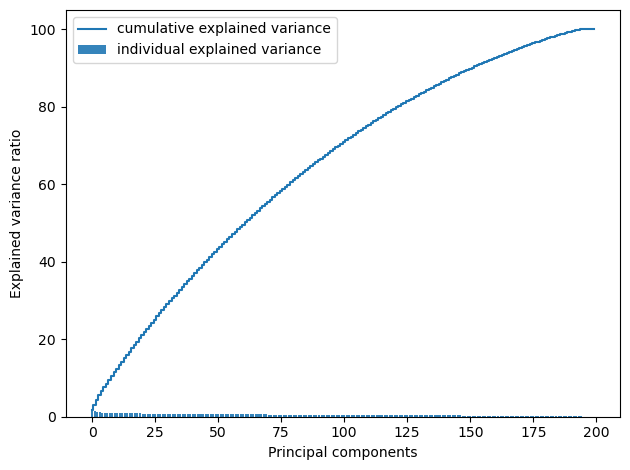

In [8]:
# plot the explained variance
plt.bar(range(200), var_exp, alpha=0.9, align='center',
label='individual explained variance')
plt.step(range(200), cum_var_exp, where='mid',
label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 90% of explained  variance gives us approximately 162 principal components according to the graph above

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,-1.501361,0.329965,-2.334824,-2.158895,-2.745039,-0.156234,0.769909,0.203448,1.405652,2.235474,...,0.656877,0.378501,-0.539060,0.148768,-0.293153,0.257682,0.180669,-1.160297,0.300455,-0.943518
1,4.818897,-1.777541,1.778166,1.066187,-0.291956,0.685306,0.078839,-0.908516,-1.128239,-0.030459,...,0.256252,-0.162384,-1.033538,1.076506,-0.102146,0.773905,-0.537132,0.838848,-0.499880,-1.227331
2,-1.012883,1.546776,0.173963,1.112913,2.576934,-1.533116,1.316954,-1.139972,-1.745036,0.608936,...,-0.566057,-2.072396,-0.359442,0.466161,-0.415924,-0.837115,-0.096972,-0.728944,0.515747,0.998063
3,0.558752,-0.879373,-1.457719,3.562212,-2.858702,-1.075588,0.941534,0.535025,-1.038221,0.923614,...,0.527688,-1.284161,-0.478262,0.528717,-0.468566,-0.152916,-0.117091,-0.577266,-0.146250,0.197099
4,1.590283,1.187119,-0.358961,1.752611,-1.878122,-0.275602,1.029193,0.131417,0.838999,0.748864,...,-0.444652,0.818572,0.571672,0.653049,-1.174932,-1.274500,0.818354,-0.148543,0.331412,-0.885732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.909264,0.164143,3.160106,0.242356,-0.853751,0.873579,1.236086,1.975211,-0.655976,1.031097,...,1.326123,1.225539,0.643385,0.212091,0.701825,-0.641875,-0.391656,-1.497166,0.041988,-0.706462
996,-0.522632,-1.428092,-0.602057,-0.069454,-1.290280,1.401538,0.314528,0.597438,0.288941,-0.531894,...,-0.281090,-0.974454,-0.800430,-0.027855,-0.055392,0.042660,0.800997,0.013751,-0.430758,1.224301
997,-1.323985,0.454502,1.852180,-0.478403,0.518728,-2.069140,1.484186,0.209916,1.494197,1.676239,...,-0.735761,-0.964598,0.038407,-0.691070,0.059888,0.723771,-1.223561,-0.785710,-0.011935,-0.245841
998,0.198010,-0.528643,-1.711577,1.688845,1.067233,1.159893,0.395703,1.326547,-0.932362,1.029393,...,-0.103882,-0.542300,0.379314,0.681309,0.220804,-0.016227,-0.853709,-1.097569,-1.199110,0.644585


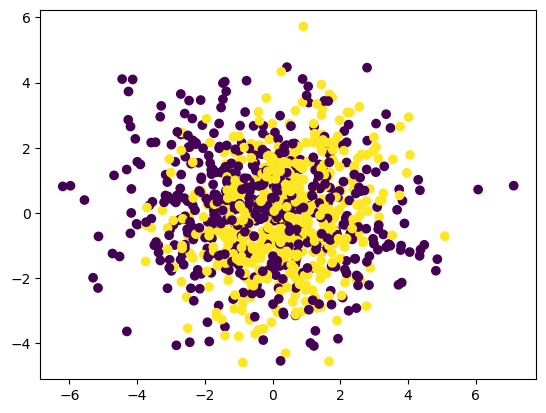

<Axes: >

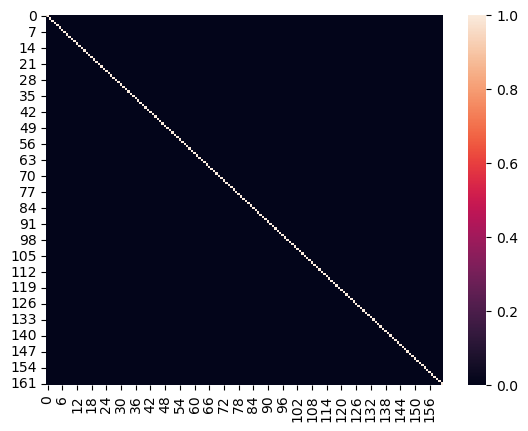

In [9]:
# perform PCA
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=162)
X_pca = (pca.fit_transform(X_std))
data_pca = pd.DataFrame(X_pca)
display(data_pca)
# plot the PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()
sns.heatmap(data_pca.corr())

#### **The above heatmap clearly depicts that there is no correlation between various obtained principal components. Thus, we have moved from higher dimensional feature space (201 features) to a lower-dimensional feature space (162 features) while ensuring that there is no correlation between the so obtained PCs is minimum. Hence, we have accomplished the objectives of PCA.**



In [10]:
print('explained variance ratio (first two components): %s'
        % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.01706784 0.01371672 0.01275116 0.01170686 0.0105348  0.01001107
 0.00987002 0.00977818 0.00941318 0.0093273  0.00925704 0.00920829
 0.00902258 0.00888077 0.00878009 0.00875868 0.00862934 0.00857841
 0.00846562 0.00836934 0.00831675 0.00821002 0.00813704 0.00809597
 0.00807183 0.00795935 0.00792795 0.00787505 0.00780304 0.00777999
 0.00771316 0.00760462 0.00758548 0.00753423 0.00747641 0.00744536
 0.00733384 0.00727159 0.00722281 0.00717657 0.00711987 0.007084
 0.00702558 0.00693687 0.00690153 0.00687527 0.00682956 0.0067912
 0.00674122 0.00668605 0.00660265 0.00655287 0.00653126 0.00648258
 0.00645449 0.00640453 0.00632081 0.0062761  0.00622554 0.0061925
 0.00614034 0.00610284 0.00604644 0.00601901 0.00598051 0.00594256
 0.00591704 0.00583829 0.00581753 0.00575355 0.00572598 0.00569563
 0.00562796 0.00560486 0.00556781 0.00555617 0.00553397 0.00545782
 0.0054127  0.00538779 0.00531724 0.00528473 0.00526145 0.00523221
 0.00520232 0.005

# **SVM Model**

Trained two SVM model from `sklearn.svm.SVC` with kernel 'rbf', gamma = 'auto', and C = 10. 
Target column is `y`. 
- Model 1 was trained on original data (after scaling)
- Model 2 was trained on the dataset obtained after PCA with 130 components

Split data to Train and Test, 80/20 ratio. 

Reported following metrics on the test dataset:
- Confusion matrix
- F1 weighted

Set random_state = 142 on all models and functions with this argument.


#### Model 1: 

In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2,random_state=142) 

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

f1_score=f1_score(y_test,y_pred,average='weighted')
confusion_matrix=confusion_matrix(y_test,y_pred)
print("\nF1 Score (Target Encoding):",f1_score)
print("Confusion Matrix:\n",confusion_matrix)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


F1 Score (Target Encoding): 0.7748030018761725
Confusion Matrix:
 [[75 26]
 [19 80]]
Accuracy: 0.775


#### Model 2: 

In [12]:
# perform PCA on 130 components
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=130)
X_pca = (pca.fit_transform(X_std))
data_pca = pd.DataFrame(X_pca)


In [13]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.2,random_state=142) 

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

f1_score=f1_score(y_test,y_pred,average='weighted')
confusion_matrix=confusion_matrix(y_test,y_pred)
print("\nF1 Score (Target Encoding):",f1_score)
print("Confusion Matrix:\n",confusion_matrix)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


F1 Score (Target Encoding): 0.7893677238057003
Confusion Matrix:
 [[85 16]
 [26 73]]
Accuracy: 0.79


#### **How are the model results different?**
- The regular model and the PCA model only vary slightly. But this could be due to the fact that the number of PCA's chosen was either less than or greater than what was needed to increase model accuracy
#### **Advantages of using PCA:**
- PCA can compress data while preserving most of the original information. Additionally, PCA offers linearity, computational efficiency, and scalability for large datasets.
- Hence, Using PCA to reduce the number of features is definitely a better course of action. While using 130 components is not making much of a difference (F1 score is 0.7944910855337395) , using 177 components that explains 100% of the variance produces an F1 score of 0.829796 as shown below.
- Basically, PCA can greatly help increase the accuracy of the model if the right number of components are chosen.
  

In [14]:
# perform PCA on 177 components
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=177)
X_pca = (pca.fit_transform(X_std))
data_pca = pd.DataFrame(X_pca)


In [15]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.2,random_state=142) 

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

f1_score=f1_score(y_test,y_pred,average='weighted')
confusion_matrix=confusion_matrix(y_test,y_pred)
print("\nF1 Score (Target Encoding):",f1_score)
print("Confusion Matrix:\n",confusion_matrix)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


F1 Score (Target Encoding): 0.829795673076923
Confusion Matrix:
 [[87 14]
 [20 79]]
Accuracy: 0.83


# **Model Explainability: Understanding which features are close to each other**

Trained H2O GLRM model on the input dataset (minus column `y`).
Useed following parameters to define model:
```
rank2_model = H2OGeneralizedLowRankEstimator(k=2,
                                             model_id = "rank2", 
                                             seed = 1234, 
                                             loss="Absolute",
                                             transform="standardize",
                                             representation_name="rank2_full")

```

The model will compress dataset to two features only.
Our goal is to understand what features ("col0" to col_199") are close to each other. We will use two-dimensional graph to do it.



In [16]:
import h2o
from h2o.estimators import H2OGeneralizedLowRankEstimator

h2o.init()
h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,22 days 4 hours 19 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 16 days
H2O_cluster_name:,H2O_from_python_aishwaryaadiki_plrork
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.114 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,3
H2O_cluster_status:,"locked, healthy"


In [17]:
# Import Data
data = h2o.import_file("lab_9_data.csv")
data

col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,y
0.417138,-1.29361,-1.0593,-1.05953,0.381752,-0.43031,-0.307272,1.38582,0.589694,1.6667,1.31147,1.19195,0.0649472,-1.41523,1.31451,-1.73622,-0.38714,1.44643,0.346575,-0.61984,2.21896,-0.398524,-0.506723,-0.409402,0.142797,0.273736,0.498196,-1.60552,-0.0312061,-0.749582,-0.811901,-0.93747,0.153438,2.07482,0.589689,-0.672951,-0.429152,-0.000545631,0.0293349,0.269769,-1.20069,-0.308039,0.609292,0.466339,-0.203195,-1.7998,-0.457277,-0.701985,-0.47369,-3.79211,0.457003,-0.089994,0.635649,0.447822,-0.811163,2.83709,-0.359703,-0.228304,2.68294,0.899582,0.0522253,3.67576,-1.57586,1.08158,-5.35521,-1.31571,-0.295899,-1.00273,-0.76341,-0.904252,-0.137978,-1.13504,1.73701,0.393659,0.23234,0.0490588,-0.997949,-3.95493,-0.107809,0.524602,1.55345,0.364169,0.467647,0.12826,-8.47787,-1.12686,-0.29369,0.494578,-1.83754,0.206772,-0.763123,-0.328998,0.313047,1.77867,0.483358,0.365726,0.657645,0.896576,-1.10321,0.433558,-0.604027,-1.45953,1.80421,0.382048,0.843025,-0.426941,0.551774,0.41839,1.50518,0.497636,-0.0346946,-0.00895392,0.432747,1.6363,-1.02813,-1.09865,-0.370883,1.71875,1.05752,-1.56342,1.59186,0.0591166,1.49491,-1.55973,-1.30868,0.771517,-0.00979843,1.03383,1.97851,-0.564011,0.479221,-0.0708604,-0.851853,1.14327,-4.58542,0.730273,0.0286885,0.769356,0.402913,0.537292,0.621774,1.72451,-0.731938,0.00118317,-1.01384,1.32217,0.612437,1.55546,0.420927,-0.805546,-1.77725,-2.30479,-0.8484,0.506869,-0.339288,0.988474,0.56794,-0.548534,0.81615,-0.943872,0.670743,-2.89349,-0.747136,-1.6222,1.55332,-0.333615,0.201438,0.57891,0.455273,-0.529282,0.604571,-6.14462,1.00213,0.780659,0.479004,-1.94406,-1.0756,-0.651431,1.78583,-1.92977,1.28509,-1.65101,-1.27104,-0.460941,-0.497611,2.28597,-1.54522,0.199028,0.883517,-1.26812,-2.26559,6.52711,0.0870059,-1.62198,-0.629728,2.65121,0.530446,-0.314525,0.84246,0.0155829,1
-1.369,-0.139701,-2.0648,0.3372,0.641051,-0.117311,0.473875,-1.07185,1.65455,0.0565242,-0.300712,-0.155206,-0.676662,-0.309092,0.0901343,0.530625,1.07687,-0.24656,0.0799048,1.00401,-1.74874,1.0031,0.673671,0.00665693,-0.0530958,-1.18786,-1.55426,-0.697532,1.03012,-0.00168115,1.23842,0.0617427,0.587774,6.14549,0.834936,-0.908335,0.677951,-1.15879,1.53422,-0.979048,0.333034,0.670469,0.686321,1.1182,0.577974,-0.943833,0.3573,0.769239,-0.244336,5.43751,0.276127,-0.281579,1.60508,1.52715,-0.0640792,2.15572,0.389426,1.73057,-0.856551,-0.59393,1.95597,3.97041,1.01396,-1.47155,3.5503,0.759449,0.184685,-0.00930667,-0.749277,-0.300029,0.0503845,0.289825,0.544543,-0.124044,0.187229,1.61693,

In [18]:
X = data.drop("y", axis = 1)
y = data["y"]

In [19]:
glrm_cols = X.columns

rank2_model = H2OGeneralizedLowRankEstimator(k=2,
                                             model_id = "rank2", 
                                             seed = 1234, 
                                             loss="Absolute",
                                             transform="standardize",
                                             representation_name="rank2_full")

rank2_model.train(training_frame=X, x=glrm_cols)

Model Details
=============
H2OGeneralizedLowRankEstimator : Generalized Low Rank Modeling
Model Key: rank2


Model Summary: 
    number_of_iterations    final_step_size    final_objective_value
--  ----------------------  -----------------  -----------------------
    200                     8.95522e-05        157717

ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 196953.21772035176
Misclassification Error (Categorical): 0.0

Scoring History: 
     timestamp            duration    iterations    step_size               objective
---  -------------------  ----------  ------------  ----------------------  ------------------
     2024-04-30 00:01:32  0.259 sec   0.0           1.05                    159462.71856860945
     2024-04-30 00:01:32  0.274 sec   1.0           1.1025                  159384.68453678064
     2024-04-30 00:01:32  0.288 sec   2.0           1.1576250000000001      159298.33471297182
     2024-04-30 00:01:32  0.301 sec   3.0           1.2155062500000002      159276.8032459956
     2024-04-30 00:01:32  0.313 sec   4.0           0.8103375000000002      159276.8032459956
     2024-04-30 00:01:32  0.325 sec   5.0           0.8508543750000002      158798.73541122797
     2024-04-30 00:01:32  0.337 sec   6.0           0.8933970937500002      158563.80318487302
     2024-04-30 00:01:32  0.349 sec   7.0           0.9380669484375003      158528.27810152867
     2024-04-30 00:01:32  0.360 sec   8.0           0.6253779656250001      158528.27810152867
     2024-04-30 00:01:32  0.373 sec   9.0           0.6566468639062502      158275.6376190973
---  ---                  ---         ---           ---                     ---
     2024-04-30 00:01:34  2.676 sec   190.0         0.00022553521154239147  157716.57957398886
     2024-04-30 00:01:34  2.694 sec   191.0         0.00015035680769492766  157716.57957398886
     2024-04-30 00:01:34  2.707 sec   192.0         0.00015787464807967406  157716.5780181142
     2024-04-30 00:01:34  2.720 sec   193.0         0.00016576838048365777  157716.5774224998
     2024-04-30 00:01:34  2.732 sec   194.0         0.00017405679950784067  157716.57646353872
     2024-04-30 00:01:34  2.746 sec   195.0         0.0001827596394832327   157716.57580439592
     2024-04-30 00:01:34  2.758 sec   196.0         0.00012183975965548847  157716.57580439592
     2024-04-30 00:01:34  2.771 sec   197.0         0.0001279317476382629   157716.57478701102
     2024-04-30 00:01:34  2.784 sec   198.0         0.00013432833502017604  157716.57346964057
     2024-04-30 00:01:34  2.795 sec   199.0         8.955222334678402e-05   157716.57346964057
[200 rows x 6 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [20]:
X = h2o.get_frame("rank2_full")
Y = rank2_model.archetypes()
print(X.shape)
print(len(Y), len(Y[0]))

(1000, 2)
2 200


In [21]:
X

Arch1,Arch2
0.773195,0.340106
-0.0153572,0.855327
0.509088,0.397259
0.454706,0.45655
0.380403,0.59449
0.450638,0.61789
0.925322,0.117911
0.723931,0.283101
0.155143,0.813858
0.486395,0.318107


In [22]:
rank2_model.transform_frame(data)

Arch1,Arch2
0.675364,0.126606
-0.744989,0.162897
0.218486,0.107377
-0.268687,-0.268053
1.28619,1.44585
0.891003,1.03161
1.78045,0.897553
1.0238,0.582232
-0.488869,0.168784
0.623954,0.47082


In [23]:
import pandas as pd

archetypes_cols = rank2_model._model_json["output"]["archetypes"].as_data_frame().reset_index(drop=True).columns.to_list()
archetypes_y = pd.DataFrame({'Arch1':Y[0],'Arch2':Y[1], 'attribute':archetypes_cols[1:]})
archetypes_y

,Arch1,Arch2,attribute
0,0.067340,-0.084983,col_0
1,0.065193,-0.123497,col_1
2,0.204717,-0.152098,col_2
3,-0.283952,0.351996,col_3
4,-0.103622,0.117302,col_4
...,...,...,...
195,-0.158369,0.188372,col_195
196,-0.047310,-0.051723,col_196
197,-0.307876,0.305997,col_197
198,0.080972,-0.060115,col_198


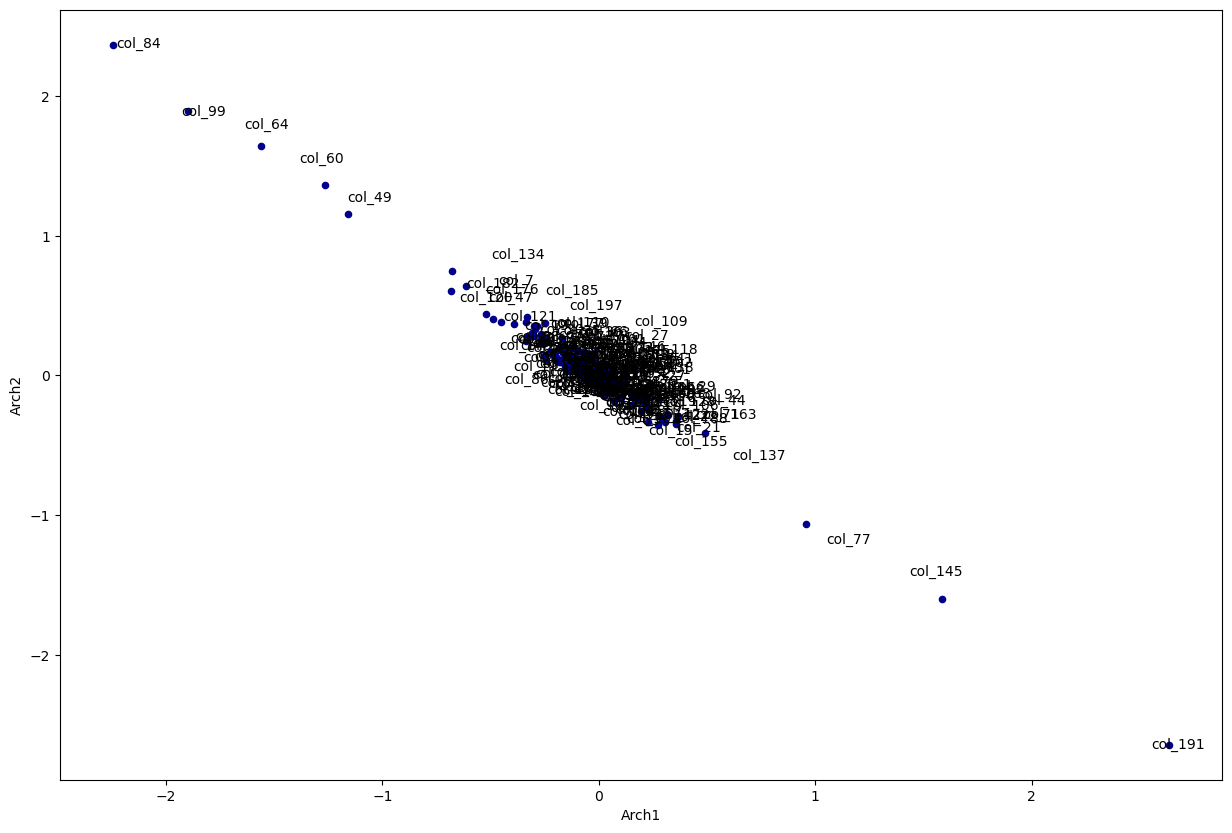

In [24]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as pl
import random

pl.rcParams['figure.figsize'] = [15, 10]

ax1 = archetypes_y.plot.scatter(x='Arch1',
                                y='Arch2',
                                c='DarkBlue')
for i, txt in enumerate(archetypes_cols[1:]):
        ax1.annotate(txt, (Y[0][i]+random.uniform(-0.2,0.2), Y[1][i]+random.uniform(-0.2,0.2)))



#### **It looks like points for col_134 and col_182 are close. Additionally, it also looks like the points for col_176 and col_47 are close**

## Question 4

Use notebook Tensorflow_image_classification_add_cnn_layer.ipynb as starting point.

Your goal is to reduce number of parameters in the last NN architecture:
```
model_cnn_with_drop = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(IMG_ROWS, IMG_COLS, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(NUM_CLASSES)
])

model_cnn_with_drop.compile(
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])
```
The above architecture uses 241,546 trainable params. Reduce number of layers/parameters so that final model has below 100k trainable params.  
Generate accuracy metric on Test dataset and produce graph with training/validation loss and accuracy for your improved model. 

In [26]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 16.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 81.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 81.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 76.1 MB/s eta 0:00:00:00:01
   ━━━━━

In [27]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.python import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.16.1


In [28]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
train_images = train_images / 255.0

test_images = test_images / 255.0

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=.2, random_state=123)

In [31]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28)
Fashion MNIST valid -  rows: 12000  columns: (28, 28)


In [32]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128

In [37]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(IMG_ROWS, IMG_COLS, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES)
])

model_cnn.compile(
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,442 (384.54 KB)

 Trainable params: 98,442 (384.54 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model_cnn_hist = model_cnn.fit(X_train, y_train,
                               batch_size=BATCH_SIZE,
                               epochs=NO_EPOCHS,
                               verbose=0,
                               validation_data=(X_val, y_val))

In [41]:
test_loss, test_acc = model_cnn.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8917 - loss: 0.7584

Test accuracy: 0.891700029373169


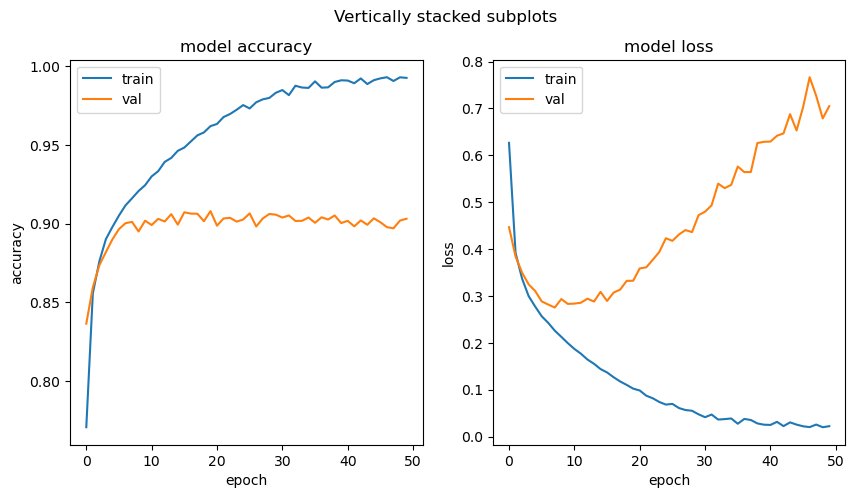

In [40]:
from matplotlib import pyplot as plt

def plot_model_results(history):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.suptitle('Vertically stacked subplots')
  fig.set_figheight(5)
  fig.set_figwidth(10)

  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_title('model accuracy')
  ax1.set(xlabel='epoch', ylabel='accuracy')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_title('model loss')
  ax2.set(xlabel='epoch', ylabel='loss')
  ax2.legend(['train', 'val'], loc='upper left')

  plt.show()

plot_model_results(model_cnn_hist)